### Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1. Как критики относятся к спортивным играм?
2. Критикам нравятся больше игры на PC или на PS4?
3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:
- Сформулируйте нулевую и альтернативную гипотезы;
- Выберите пороговый уровень статистической значимости;
- Опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as st

# Загрузим данные из CSV файла
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Проверим, как критики относятся к спортивным играм
# Отфильтруем данные по играм на спортивные игры и игры других жанров
sports_games = df[df['Genre'] == 'Sports']
other_games = df[df['Genre'] != 'Sports']

sports_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E


In [3]:
# Выполним t-тест для сравнения оценок критиков
t_stat, p_value = stats.ttest_ind(sports_games['Critic_Score'].dropna(), other_games['Critic_Score'].dropna(), equal_var=False)

# Зададим пороговый уровень значимости в 5%
alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу.\nСредняя оценка критиков для спортивных игр, вероятно, отличается от средней оценки для остальных жанров.')
else:
    print('Не отвергаем нулевую гипотезу.\nСредняя оценка критиков для спортивных игр, вероятно, равна средней оценке для остальных жанров.')

Отвергаем нулевую гипотезу.
Средняя оценка критиков для спортивных игр, вероятно, отличается от средней оценки для остальных жанров.


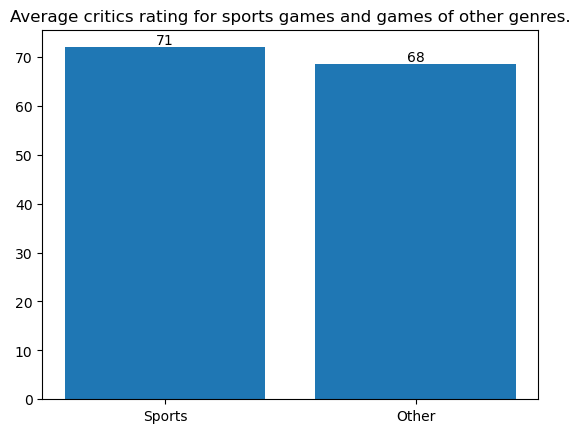

In [4]:
# Визуализация результатов
plt.title('Average critics rating for sports games and games of other genres.')
genres = ['Sports', 'Other']
avg_score = [sports_games['Critic_Score'].dropna().mean(), other_games['Critic_Score'].dropna().mean()]
plt.bar(genres, avg_score)

for i, val in enumerate(avg_score):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

plt.show()    

Можно сделать вывод о том, что критики, в среднем, относятся к спортивным играм немного лучше, чем к играм других жанров.

In [5]:
# Попробуем ответить на вопрос о предпочтениях критиков относительно игровой платформы
# Отфильтруем данные по играм на PC и PS4
pc_games = df[df['Platform'] == 'PC']
ps4_games = df[df['Platform'] == 'PS4']

pc_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
85,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.99,6.42,0.0,0.60,8.01,86.0,75.0,7.6,886.0,The Sims Studio,T
138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.08,6.21,0.0,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.0,0.54,5.14,88.0,86.0,4,9629.0,Blizzard Entertainment,M
195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12,NaN,NaN,NaN,NaN,NaN,NaN
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.57,1.68,0.0,0.58,4.84,93.0,82.0,8.2,3052.0,Blizzard Entertainment,T


In [6]:
# Выполним t-тест для сравнения оценок критиков
t_stat, p_value = stats.ttest_ind(pc_games['Critic_Score'].dropna(), ps4_games['Critic_Score'].dropna(), equal_var=False)

# Зададим пороговый уровень значимости в 5%
alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу.\nСредняя оценка критиков для игр на PC, вероятно, отличается от средней оценки для игр на PS4.')
else:
    print('Не отвергаем нулевую гипотезу.\nСредняя оценка критиков для игр на PC, вероятно, равна средней оценке для игр на PS4.')

Отвергаем нулевую гипотезу.
Средняя оценка критиков для игр на PC, вероятно, отличается от средней оценки для игр на PS4.


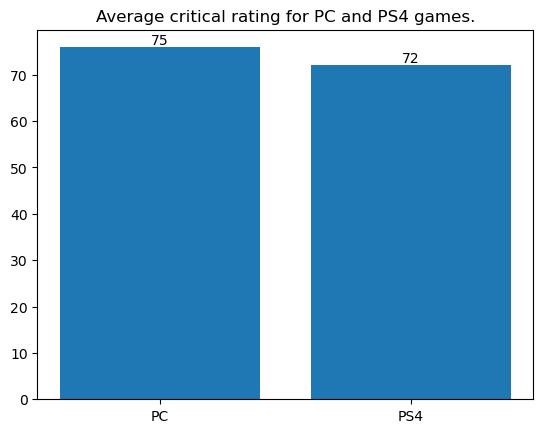

In [7]:
# Визуализация результатов
plt.title('Average critical rating for PC and PS4 games.')
platforms = ['PC', 'PS4']
avg_score = [pc_games['Critic_Score'].dropna().mean(), ps4_games['Critic_Score'].dropna().dropna().mean()]
plt.bar(platforms, avg_score)

for i, val in enumerate(avg_score):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

plt.show()   

Можно сделать вывод о том, что критики, в среднем, отдают предпочтение играм на PC.

In [8]:
# Выясним, какой жанр нравится критикам больше: стрелялки или стратегии
# Отфильтруем данные по играм на игры в жанре 'Shooter' и 'Strategy'
shooter_games = df[df['Genre'] == 'Shooter']
strategy_games = df[df['Genre'] == 'Strategy']

shooter_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


In [9]:
# Выполним t-тест для сравнения оценок критиков
t_stat, p_value = stats.ttest_ind(shooter_games['Critic_Score'].dropna(), strategy_games['Critic_Score'].dropna(), equal_var=False)

# Зададим пороговый уровень значимости в 5%
alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу.\nСредняя оценка критиков для игр жанра "Shooter" отличается от средней оценки для игр жанра "Strategy".')
else:
    print('Не отвергаем нулевую гипотезу.\nСредняя оценка критиков для игр жанра "Shooter" равна средней оценке для игр жанра "Strategy".')


Отвергаем нулевую гипотезу.
Средняя оценка критиков для игр жанра "Shooter" отличается от средней оценки для игр жанра "Strategy".


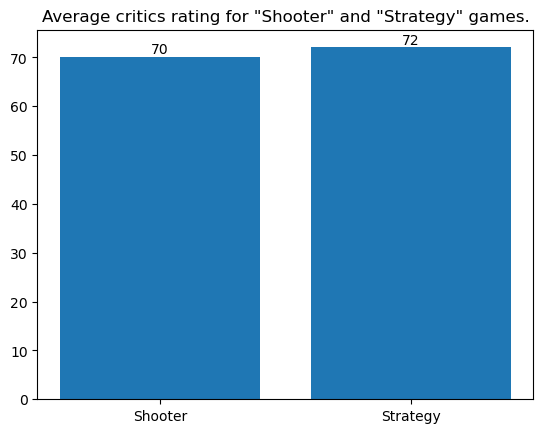

In [10]:
# Визуализация результатов
plt.title('Average critics rating for "Shooter" and "Strategy" games.')
genres = ['Shooter', 'Strategy']
avg_score = [shooter_games['Critic_Score'].dropna().mean(), strategy_games['Critic_Score'].dropna().dropna().mean()]
plt.bar(genres, avg_score)

for i, val in enumerate(avg_score):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

plt.show()   

Можно сделать вывод о том, что критики, в среднем, оценивают "стратегии" выше "стрелялок".

### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений по признаку спама. Для этого:

1. Приведите весь текст к нижнему регистру;
2. Удалите мусорные символы;
3. Удалите стоп-слова;
4. Приведите все слова к нормальной форме;
5. Преобразуйте все сообщения в вектора TF-IDF;
6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте `train_test_split`;
7. Постройте модель логистической регрессии, укажите `random_state=42`, оцените её точность на тестовых данных;
8. Опишите результаты при помощи `confusion_matrix`;
9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [11]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
# Загрузим необходимые данные 
df = pd.read_csv('spam.csv') 

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Приведём текст к нижнему регистру
df['Message'] = df['Message'].str.lower()

df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [14]:
# Удалим мусорные символы
df['Message'] = df['Message'].apply(lambda x: re.sub(r'\W', ' ', x))

df.head()

,Category,Message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


In [ ]:
# Удалим стоп-слова
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
df['Message'] = df['Message'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

df.head()

In [ ]:
# Приведем слова к нормальной форме
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['Message'] = df['Message'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

df.head()

In [17]:
# Преобразуем сообщения в векторы TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [18]:
# Разделим данные на тренировочный и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.3, random_state=42)

In [19]:
# Обучим модель логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# Оценим точность модели на тестовых данных
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy) 

Accuracy: 0.958732057416268


In [21]:
# Построим матрицу ошибок (confusion matrix)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1445    3]
 [  66  158]]


In [22]:
# Построим датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно:
misclassified = df.loc[y_test.index[y_test != y_pred], ['Message', 'Category']]
misclassified['Predicted'] = y_pred[y_test != y_pred]
print("Misclassified Messages:")
print(misclassified)

Misclassified Messages:
                                                Message Category Predicted
2952                                      hey free call      ham      spam
881   reminder downloaded content already paid goto ...     spam       ham
1961  guess somebody know secretly fancy wanna find ...     spam       ham
3864  oh god found number glad text back xafter msg ...     spam       ham
2575  next amazing xxx picsfree1 video sent enjoy on...     spam       ham
...                                                 ...      ...       ...
4543  freemsg hi baby wow got new cam moby wanna c h...     spam       ham
752     important customer service announcement premier     spam       ham
309   themob check newest selection content game ton...     spam       ham
495                                           free call      ham      spam
305   sm ac blind date 4u rodds1 21 aberdeen united ...     spam       ham

[69 rows x 3 columns]
